# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Neural Network Analysis </p></div>

Published on January 11, 2024  
Author: Jocelyn C. Dumlao


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Dataset Overview: </p></div>

- **Features:** AGE, GENDER, MARITAL_STATUS, GROSS_ANNUAL_INCOME, EDUCATION, OCCUPATION, CASH, EQUITY, INSURANCE, FIXED_DEPOSIT, ...
- **Target Variables:** GOAL, BI1, BI2

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Approach: </p></div>

- **Objective:** Predict financial goals or assess financial risk using neural networks.

- **Preprocessing:** Normalize numerical features, one-hot encode categorical features, handle missing values.

- **Model:** Train a neural network with appropriate architecture for regression (for predicting continuous values) or classification (for predicting discrete labels).


<div style="border-radius: 10px; border: 2px solid #FF6347; padding: 15px; background-color: #FFD8C2; font-size: 100%; text-align: left;">
    
<font size="+2" color="#059c99"><b>Examples:</b></font>


<font size="+1" color="#0000FF"><b>1. Predict Financial Goal: </b></font>

- **Task:** Use the neural network to predict the financial goal (GOAL) based on demographic and financial features.
- **Explanation:** The model can learn patterns in the data to predict the financial goal of an individual, which could be useful for personalized financial planning.

<font size="+1" color="#0000FF"><b>2. Risk Assessment - Binary: </b></font>

- **Task:** Classify individuals into high or low financial risk (BI1) using neural networks.
- **Explanation:** Train the model to identify individuals with high or low financial risk, aiding in targeted risk management strategies.

<font size="+1" color="#0000FF"><b>3. Risk Assessment - Multi-class: </b></font>

- **Task:** Classify individuals into different risk categories (BI2) using neural networks.
- **Explanation:** This could provide a more nuanced view of financial risk, allowing for more tailored risk mitigation strategies.

<font size="+1" color="#0000FF"><b>4. Income Prediction:</b></font>

- **Task:** Predict GROSS_ANNUAL_INCOME using neural networks.
- **Explanation:** Understand the factors influencing income and predict an individual's annual income for financial planning purposes.

<font size="+1" color="#0000FF"><b>5. Occupation Influence: </b></font>

- **Task:** Analyze how OCCUPATION influences financial decisions (e.g., INSURANCE purchases) using feature importance from the neural network.
- **Explanation:** Understand the impact of occupation on financial behavior for targeted marketing or services.

<font size="+1" color="#0000FF"><b>6. Age and Insurance Relationship: </b></font>

- **Task:** Explore the relationship between AGE and INSURANCE purchases.
- **Explanation:** Identify patterns to tailor insurance offerings based on age groups.

<font size="+1" color="#0000FF"><b>7. Education and Fixed Deposit: </b></font>

- **Task:** Investigate how the EDUCATION level affects the likelihood of having a FIXED_DEPOSIT.
- **Explanation:** Understand the relationship between education and long-term savings habits.

<font size="+1" color="#0000FF"><b>8. Gender and Investment Choices: </b></font>

- **Task:** Analyze how GENDER influences investment choices (e.g., EQUITY) using the neural network.
- **Explanation:** Identify gender-specific trends in investment preferences.

<font size="+1" color="#0000FF"><b>9. Marital Status and Cash Holdings: </b></font>

- **Task:** Examine the correlation between MARITAL_STATUS and CASH holdings.
- **Explanation:** Understand how marital status might impact short-term liquidity preferences.

<font size="+1" color="#0000FF"><b>10. Combined Goal and Risk Assessment: </b></font>

- **Task:** Develop a neural network to simultaneously predict GOAL and assess financial risk (BI1 or BI2).
- **Explanation:** Create a comprehensive model considering both financial goals and risk factors for a more holistic financial planning approach.

These are just illustrative examples, and the specific tasks and analyses can be tailored based on the objectives and nuances of the dataset.

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Libraries</p></div>


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

from sklearn.exceptions import NotFittedError
from sklearn.utils.validation import check_is_fitted
from sklearn.multioutput import RegressorChain
from sklearn.base import TransformerMixin

import warnings
warnings.filterwarnings("ignore")

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Load the Data </p></div>



In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/the-role-of-habits-in-investing-behaviors/The role of habits in investing behaviors/CODED_DATA(paper).csv')
df.head()

,AGE,GENDER,MARITAL_STATUS,GROSS_ANNUAL_INCOME,EDUCATION,OCCUPATION,CASH,EQUITY,INSURANCE,FIXED_DEPOSIT,...,RA2,RA3,FQPB,PBC1,PBC2,PBC3,PBC4,GOAL,BI1,BI2
0,3,2,2,5,4,2,4,6,3,2,...,3,6,1,1,2,5,5,138,1,2
1,3,2,1,5,4,2,5,4,4,3,...,3,1,6,2,6,4,5,614,5,5
2,4,2,1,5,4,2,1,4,3,4,...,5,5,6,7,7,7,7,741,7,7
3,3,2,2,6,4,2,3,1,4,3,...,3,2,5,5,6,6,6,2,7,6
4,4,2,2,6,4,2,6,5,3,1,...,3,5,5,5,6,6,6,61,7,7


In [3]:
df.shape

(423, 27)

In [4]:
df = df.drop_duplicates()

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AGE                  423 non-null    int64
 1   GENDER               423 non-null    int64
 2   MARITAL_STATUS       423 non-null    int64
 3   GROSS_ANNUAL_INCOME  423 non-null    int64
 4   EDUCATION            423 non-null    int64
 5   OCCUPATION           423 non-null    int64
 6   CASH                 423 non-null    int64
 7   EQUITY               423 non-null    int64
 8   INSURANCE            423 non-null    int64
 9   FIXED_DEPOSIT        423 non-null    int64
 10  GOLD                 423 non-null    int64
 11  MUTUAL_FUNDS         423 non-null    int64
 12  BEH                  423 non-null    int64
 13  RP1                  423 non-null    int64
 14  RP2                  423 non-null    int64
 15  RP3                  423 non-null    int64
 16  RA1                  423 n

In [7]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL_STATUS', 'GROSS_ANNUAL_INCOME', 'EDUCATION',
       'OCCUPATION', 'CASH', 'EQUITY', 'INSURANCE', 'FIXED_DEPOSIT', 'GOLD',
       'MUTUAL_FUNDS', 'BEH', 'RP1', 'RP2', 'RP3', 'RA1', 'RA2', 'RA3', 'FQPB',
       'PBC1', 'PBC2', 'PBC3', 'PBC4', 'GOAL', 'BI1', 'BI2'],
      dtype='object')

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 1: </b>Predict Financial Goal </p></div>
 

In [8]:
# Example 1: Predict Financial Goal
X = df.drop(['GOAL'], axis=1)
y_goal = df['GOAL']
X_train, X_test, y_train, y_test = train_test_split(X, y_goal, test_size=0.2, random_state=42)

# Neural Network for Regression
reg_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000,
                              random_state=42))])

In [9]:
for column in ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']:
    print(f'Unique values in {column} - Training set: {X_train[column].unique()}')
    print(f'Unique values in {column} - Test set: {X_test[column].unique()}')


Unique values in GENDER - Training set: [2 1]
Unique values in GENDER - Test set: [2 1]
Unique values in MARITAL_STATUS - Training set: [2 1 3]
Unique values in MARITAL_STATUS - Test set: [2 1]
Unique values in EDUCATION - Training set: [4 3 2 1]
Unique values in EDUCATION - Test set: [2 3 4 5]
Unique values in OCCUPATION - Training set: [3 2 1 6 7 5 4]
Unique values in OCCUPATION - Test set: [2 3 1 6 4 7]


In [10]:
# Modify the transformer for handling unknown categories
('cat', OneHotEncoder(handle_unknown='ignore'), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])

('cat',
 OneHotEncoder(handle_unknown='ignore'),
 ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore') 


In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [2]),  # Update handle_unknown as needed
        # Add other transformers as needed
    ],
    remainder='passthrough'  # You may need to adjust this based on your data
)

# Update your pipeline accordingly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())  # Replace with your actual regressor
])

pipeline.fit(X_train, y_train)
y_pred_goal = pipeline.predict(X_test)

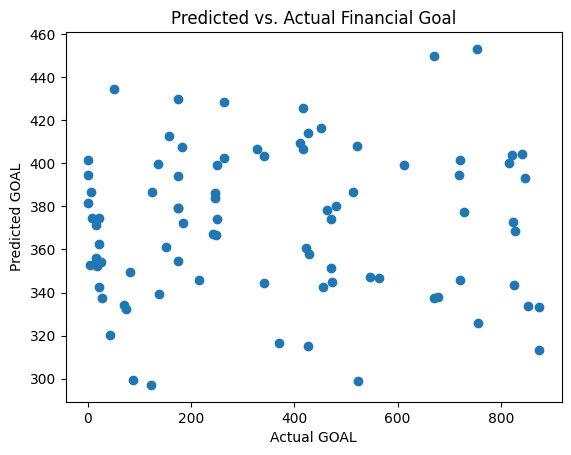

In [13]:
# Example 1 Visualization
y_pred_goal = pipeline.predict(X_test)

plt.scatter(y_test, y_pred_goal)
plt.xlabel('Actual GOAL')
plt.ylabel('Predicted GOAL')
plt.title('Predicted vs. Actual Financial Goal')
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 2: </b>Risk Assessment - Binary </p></div>
 

In [14]:
# Example 2: Risk Assessment - Binary
y_bi1 = df['BI1']
X_train, X_test, y_train, y_test = train_test_split(X, y_bi1, test_size=0.2, random_state=42)

# Neural Network for Binary Classification
clf_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [2]),  # Update handle_unknown as needed
        # Add other transformers as needed
    ],
    remainder='passthrough'  # You may need to adjust this based on your data
)

# Update your pipeline accordingly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())  # Replace with your actual regressor
])

pipeline.fit(X_train, y_train)
y_pred_bi1 = pipeline.predict(X_test)

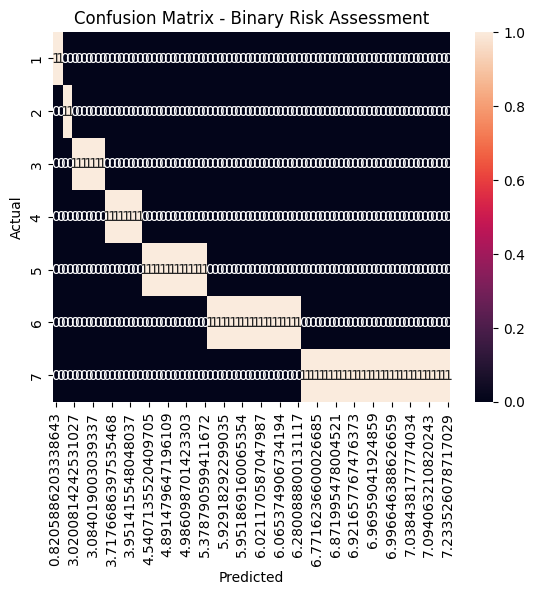

In [16]:
# Example 2 Visualization
y_pred_bi1 = pipeline.predict(X_test)

# Confusion Matrix Visualization
conf_matrix = pd.crosstab(y_test, y_pred_bi1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix - Binary Risk Assessment')
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 3: </b>Risk Assessment - Multi-class </p></div>
 

In [17]:
# Example 3: Risk Assessment - Multi-class
y_bi2 = df['BI2']
X_train, X_test, y_train, y_test = train_test_split(X, y_bi2, test_size=0.2, random_state=42)

# Neural Network for Multi-class Classification
multi_class_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

multi_class_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [2]),  # Update handle_unknown as needed
        # Add other transformers as needed
    ],
    remainder='passthrough'  # You may need to adjust this based on your data
)

# Update your pipeline accordingly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())  # Replace with your actual regressor
])

pipeline.fit(X_train, y_train)
multi_class_model = pipeline.predict(X_test)

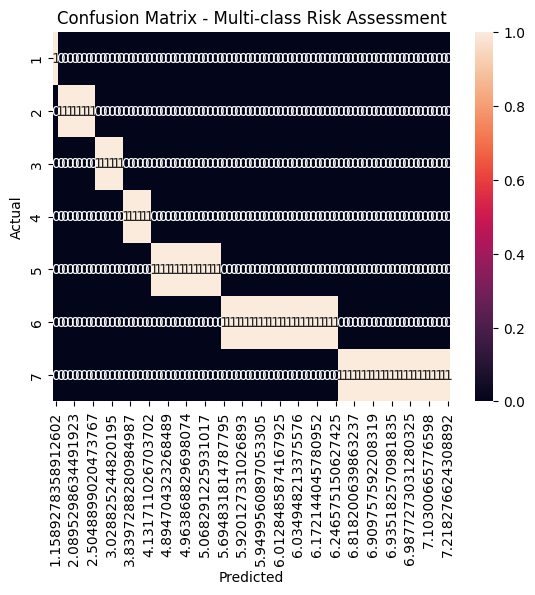

In [19]:
# Example 3 Visualization
y_pred_bi2 = pipeline.predict(X_test)

# Confusion Matrix Visualization for Multi-class
conf_matrix_multi = pd.crosstab(y_test, y_pred_bi2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix_multi, annot=True, fmt='d')
plt.title('Confusion Matrix - Multi-class Risk Assessment')
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 4: </b>Income Prediction </p></div>

In [20]:
# Example 4: Income Prediction
y_income = df['GROSS_ANNUAL_INCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y_income, test_size=0.2, random_state=42)

# Neural Network for Regression
income_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

income_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000,
                              random_state=42))])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [2]),  # Update handle_unknown as needed
        # Add other transformers as needed
    ],
    remainder='passthrough'  # You may need to adjust this based on your data
)

# Update your pipeline accordingly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())  # Replace with your actual regressor
])

pipeline.fit(X_train, y_train)
income_model = pipeline.predict(X_test)

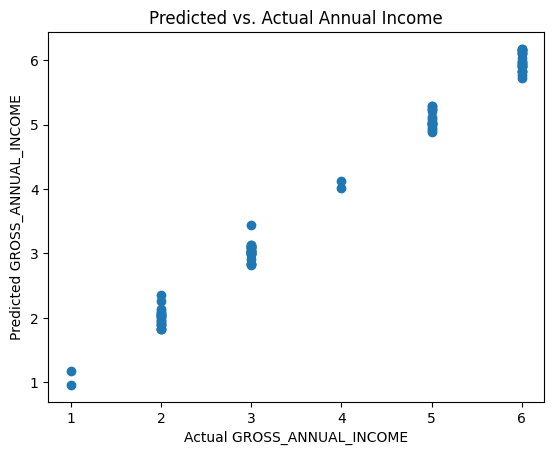

In [22]:
# Example 4 Visualization
y_pred_income = pipeline.predict(X_test)

plt.scatter(y_test, y_pred_income)
plt.xlabel('Actual GROSS_ANNUAL_INCOME')
plt.ylabel('Predicted GROSS_ANNUAL_INCOME')
plt.title('Predicted vs. Actual Annual Income')
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 5: </b>Occupation Influence </p></div>

In [23]:
# Example 5: Occupation Influence
# Assuming we want to analyze how OCCUPATION influences INSURANCE purchases
y_insurance = df['INSURANCE']
X_train, X_test, y_train, y_test = train_test_split(X, y_insurance, test_size=0.2, random_state=42)

# Neural Network for Binary Classification
insurance_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

insurance_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [2]),  # Update handle_unknown as needed
        # Add other transformers as needed
    ],
    remainder='passthrough'  # You may need to adjust this based on your data
)

# Update your pipeline accordingly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())  # Replace with your actual regressor
])

pipeline.fit(X_train, y_train)
insurance_model = pipeline.predict(X_test)

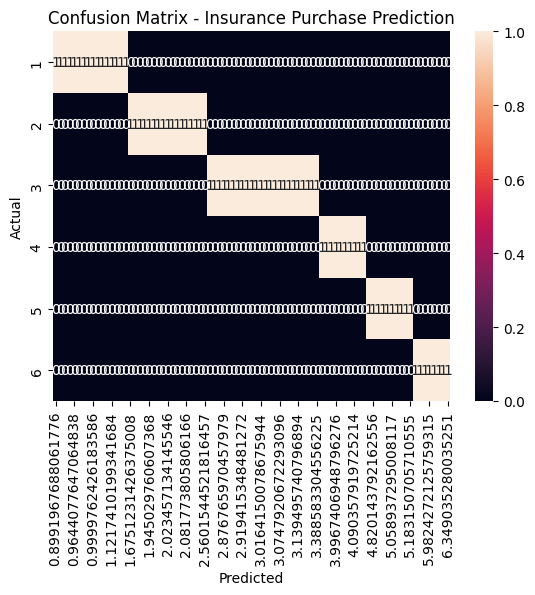

In [25]:
# Example 5 Visualization
y_pred_insurance = pipeline.predict(X_test)

# Confusion Matrix Visualization
conf_matrix_insurance = pd.crosstab(y_test, y_pred_insurance, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix_insurance, annot=True, fmt='d')
plt.title('Confusion Matrix - Insurance Purchase Prediction')
plt.show()

In [26]:
df = pd.read_csv('/kaggle/input/the-role-of-habits-in-investing-behaviors/The role of habits in investing behaviors/CODED_DATA(paper).csv')

In [27]:
df = df.drop_duplicates()

In [28]:
df.fillna(0, inplace=True)

In [29]:
# Check the number of samples in X_train and y_insurance before creating X_train_subset
print(X_train.shape, y_insurance.shape)

# Ensure that 'GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION' are present in X_train
columns_to_encode = ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']

# Verify and handle any missing values in X_train_subset
X_train_subset = X_train[['AGE'] + columns_to_encode].copy()
X_train_subset = X_train_subset.dropna()  # Drop rows with missing values

# Check the number of samples in X_train_subset after handling missing values
print(X_train_subset.shape)


(338, 26) (423,)
(338, 5)


In [30]:
#('cat', OneHotEncoder(handle_unknown='ignore'), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 6: </b>Age and Insurance Relationship </p></div>

In [31]:
# Example 6: Age and Insurance Relationship
# Assuming we want to analyze the relationship between AGE and INSURANCE purchases

# Ensure that 'GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION' are present in X_train
columns_to_encode = ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']

# Neural Network for Binary Classification
age_insurance_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE']),
            ('cat', OneHotEncoder(), columns_to_encode)
        ],
        remainder='passthrough'  # Keep the remaining columns as is
    )),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

# Ensure the target variable is correctly aligned
y_insurance = y_insurance.loc[X_train_subset.index]

# Fit the model
age_insurance_model.fit(X_train_subset, y_insurance)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['AGE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 7: </b>Education and Fixed Deposit </p></div>

In [32]:
# Example 7: Education and Fixed Deposit
# Assuming 'AGE' is a numeric feature and other columns are categorical
numeric_features = ['AGE']
categorical_features = ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']

# Extract the relevant columns from X_train
X_train_subset = X_train[numeric_features + categorical_features]
y_fixed_deposit = df['FIXED_DEPOSIT']

# Ensure the alignment of X_train_subset and y_fixed_deposit
common_indices = X_train_subset.index.intersection(y_fixed_deposit.index)
X_train_subset = X_train_subset.loc[common_indices].reset_index(drop=True)
y_fixed_deposit = y_fixed_deposit.loc[common_indices].reset_index(drop=True)

# Neural Network for Binary Classification
education_fixed_deposit_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

education_fixed_deposit_model.fit(X_train_subset, y_fixed_deposit)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

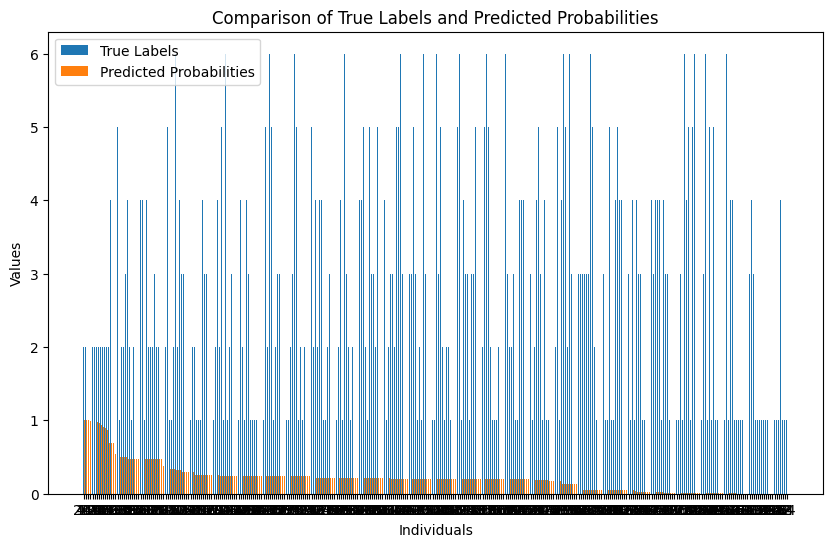

In [33]:
# Get predicted probabilities from the model
predicted_probabilities = education_fixed_deposit_model.predict_proba(X_train_subset)[:, 1]

# Create a DataFrame for visualization
visualization_df = pd.DataFrame({
    'True Labels': y_fixed_deposit,
    'Predicted Probabilities': predicted_probabilities
})

# Sort the DataFrame by predicted probabilities for better visualization
visualization_df = visualization_df.sort_values(by='Predicted Probabilities', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(visualization_df))

plt.bar(index, visualization_df['True Labels'], width=bar_width, label='True Labels')
plt.bar(index + bar_width, visualization_df['Predicted Probabilities'], width=bar_width, label='Predicted Probabilities')

plt.xlabel('Individuals')
plt.ylabel('Values')
plt.title('Comparison of True Labels and Predicted Probabilities')
plt.xticks(index + bar_width / 2, visualization_df.index)
plt.legend()

plt.show()


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 8: </b>Gender and Investment Choices </p></div>

In [34]:
# Example 8: Gender and Investment Choices
# Assuming we want to analyze how GENDER influences investment choices (e.g., EQUITY)
y_equity = df['EQUITY']
X_train, X_test, y_train, y_test = train_test_split(X, y_equity, test_size=0.2, random_state=42)

# Ensure the alignment of X_train and y_equity
X_train = X_train.loc[y_train.index]

# Neural Network for Binary Classification
gender_investment_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

gender_investment_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [2]),  # Update handle_unknown as needed
        # Add other transformers as needed
    ],
    remainder='passthrough'  # You may need to adjust this based on your data
)

# Update your pipeline accordingly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())  # Replace with your actual regressor
])

pipeline.fit(X_train, y_train)
gender_investment_model = pipeline.predict(X_test)

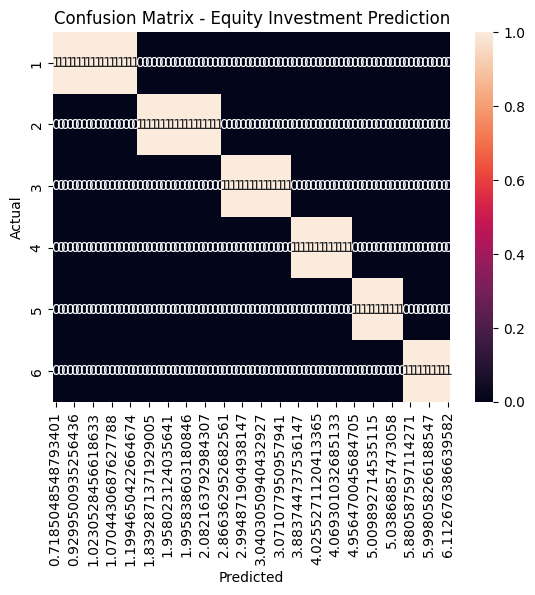

In [36]:
# Example 8 Visualization
y_pred_equity = pipeline.predict(X_test)

# Confusion Matrix Visualization
conf_matrix_equity = pd.crosstab(y_test, y_pred_equity, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix_equity, annot=True, fmt='d')
plt.title('Confusion Matrix - Equity Investment Prediction')
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 9: </b>Marital Status and Cash Holdings </p></div>

In [37]:
# Example 9: Marital Status and Cash Holdings
# Assuming we want to examine the correlation between MARITAL_STATUS and CASH holdings
y_cash = df['CASH']
X_train, X_test, y_train, y_test = train_test_split(X, y_cash, test_size=0.2, random_state=42)

# Ensure the alignment of X_train and y_cash
X_train = X_train.loc[y_train.index]

# Neural Network for Regression
marital_status_cash_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

marital_status_cash_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000,
                              random_state=42))])

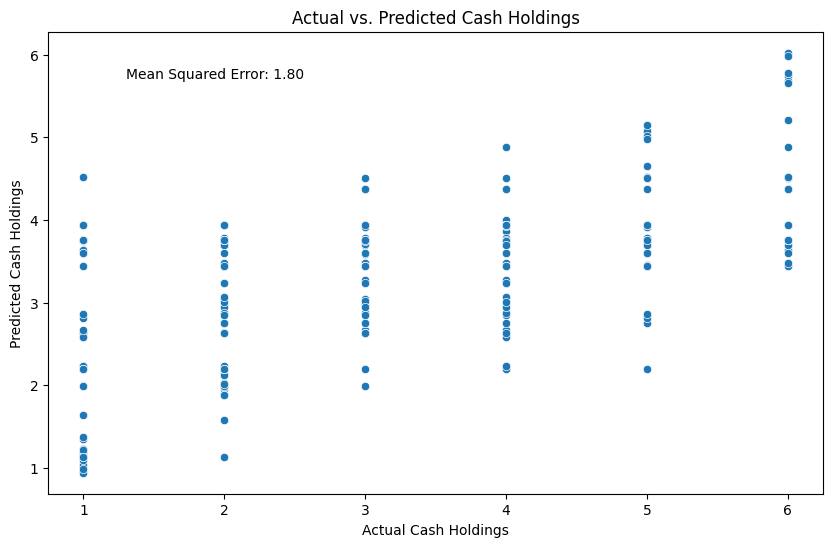

In [38]:
# Predict cash holdings for the training set
y_pred_train = marital_status_cash_model.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred_train)

# Scatter plot of actual vs. predicted cash holdings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('Actual vs. Predicted Cash Holdings')
plt.xlabel('Actual Cash Holdings')
plt.ylabel('Predicted Cash Holdings')
plt.text(0.1, 0.9, f'Mean Squared Error: {mse:.2f}', transform=plt.gca().transAxes)
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#CD5C5C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>Example 10: </b>Combined Goal and Risk Assessment </p></div>


In [39]:
from sklearn.multioutput import RegressorChain
from sklearn.base import TransformerMixin

# Custom TransformerMixin for RegressorChain
class RegressorChainTransformer(TransformerMixin):
    def __init__(self, base_estimator):
        self.model = RegressorChain(base_estimator=base_estimator)

    def fit(self, X, y=None):
        self.model.fit(X, y)
        return self

    def transform(self, X):
        return self.model.predict(X)

# Example 10: Combined Goal and Risk Assessment
# Assuming we want to develop a neural network to simultaneously predict GOAL and assess financial risk (BI1 or BI2)
y_combined_goal_risk = df[['GOAL', 'BI1', 'BI2']]
X_train, X_test, y_train, y_test = train_test_split(X, y_combined_goal_risk, test_size=0.2, random_state=42)

# Neural Network for Multi-output Regression and Classification
combined_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('regressor', RegressorChainTransformer(base_estimator=MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))),
    ('classifier', RegressorChainTransformer(base_estimator=MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)))
])

combined_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('regressor',
                 <__main__.RegressorChainTransformer object at 0x79f07042a230>),
                ('classifier',
                 <__main__.RegressorChainTransformer object at 0x79f07273e320>)])

In [40]:
# Custom TransformerMixin for RegressorChain
class RegressorChainTransformer(TransformerMixin):
    def __init__(self, base_estimator):
        self.model = RegressorChain(base_estimator=base_estimator)

    def fit(self, X, y=None):
        self.model.fit(X, y)
        return self

    def transform(self, X):
        return self.model.predict(X)

    def predict(self, X):
        return self.model.predict(X)

# Assuming you have your DataFrame 'df' and feature matrix 'X'
# Example 10: Combined Goal and Risk Assessment
# Assuming we want to develop a neural network to simultaneously predict GOAL and assess financial risk (BI1 or BI2)
y_combined_goal_risk = df[['GOAL', 'BI1', 'BI2']]
X_train, X_test, y_train, y_test = train_test_split(X, y_combined_goal_risk, test_size=0.2, random_state=42)

# Neural Network for Multi-output Regression and Classification
combined_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['AGE', 'GROSS_ANNUAL_INCOME']),
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'])
        ]
    )),
    ('regressor', RegressorChainTransformer(base_estimator=MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))),
    ('classifier', RegressorChainTransformer(base_estimator=MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)))
])

# Fit the entire pipeline on the training data
combined_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE',
                                                   'GROSS_ANNUAL_INCOME']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['GENDER', 'MARITAL_STATUS',
                                                   'EDUCATION',
                                                   'OCCUPATION'])])),
                ('regressor',
                 <__main__.RegressorChainTransformer object at 0x79f07036d6f0>),
                ('classifier',
                 <__main__.RegressorChainTransformer object at 0x79f07036d720>)])

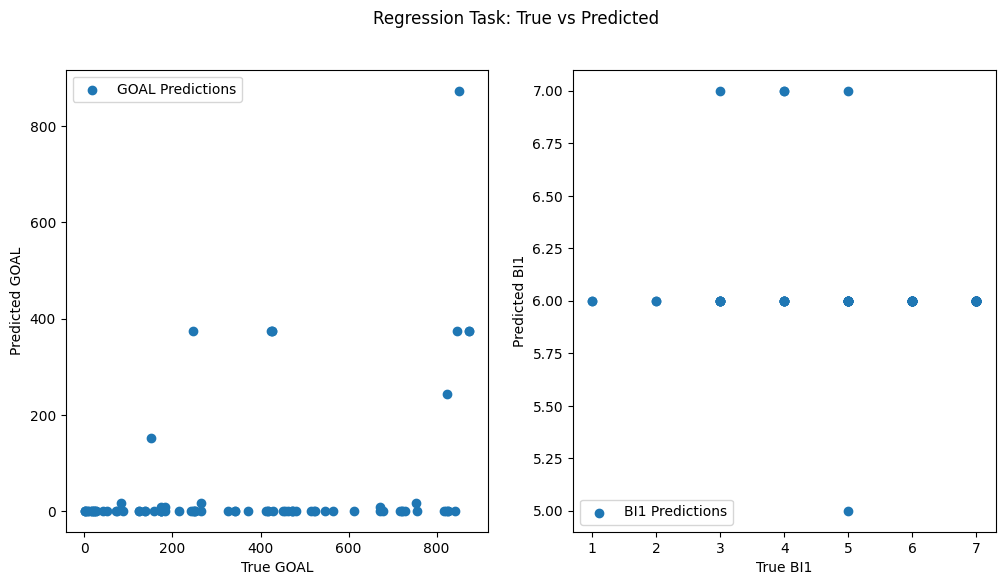

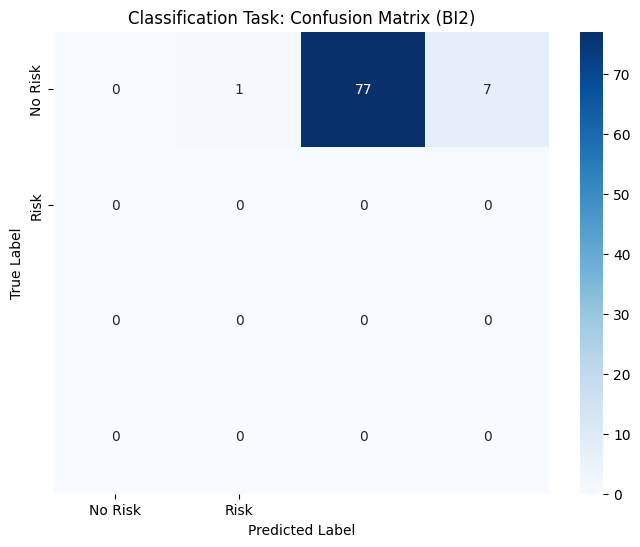

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming X_test is available
# During training, set handle_unknown='ignore' to handle unseen categories
combined_model.named_steps['preprocessor'].named_transformers_['cat'].handle_unknown = 'ignore'

# Predicting both regression and classification tasks
y_pred = combined_model.predict(X_test)

# Extracting GOAL and BI1 predictions for the regression task
y_pred_regression = y_pred[:, [0, 1]]

# Extracting BI2 predictions for the classification task
y_pred_classification = y_pred[:, [2]]  # Only one output for BI2

# Converting to binary labels
y_test_binary = y_test['BI2'].apply(lambda x: 1 if x > 0 else 0)

# Plotting regression predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test['GOAL'], y_pred_regression[:, 0], label='GOAL Predictions')
plt.xlabel('True GOAL')
plt.ylabel('Predicted GOAL')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test['BI1'], y_pred_regression[:, 1], label='BI1 Predictions')
plt.xlabel('True BI1')
plt.ylabel('Predicted BI1')
plt.legend()

plt.suptitle('Regression Task: True vs Predicted')
plt.show()

# Plotting confusion matrix for the classification task
plt.figure(figsize=(8, 6))

# Converting BI2 predictions to binary labels
y_pred_binary = y_pred_classification[:, 0]

cm = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Classification Task: Confusion Matrix (BI2)')
plt.show()


<div class="alert alert-block alert-info"> "Your positive feedback and upvotes are incredibly appreciated! They inspire me to create more valuable content and help others in their learning journey. Your support fosters a vibrant community of knowledge-sharing. Thank you for considering an upvote, and best wishes on your learning journey!" 😊📌</div>